Let's import some libraries that we will need.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style(style='whitegrid')

Now we move on to the CALLOUT table. This table has information regarding when a patient was cleared for ICU discharge and when the patient was actually discharged.

In [3]:
callout_df = pd.read_csv('..\Extracted CSVs\CALLOUT.csv')

Getting a feel for the data

In [4]:
callout_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34499 entries, 0 to 34498
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ROW_ID                  34499 non-null  int64  
 1   SUBJECT_ID              34499 non-null  int64  
 2   HADM_ID                 34499 non-null  int64  
 3   SUBMIT_WARDID           34498 non-null  float64
 4   SUBMIT_CAREUNIT         5122 non-null   object 
 5   CURR_WARDID             34498 non-null  float64
 6   CURR_CAREUNIT           34498 non-null  object 
 7   CALLOUT_WARDID          34499 non-null  int64  
 8   CALLOUT_SERVICE         34499 non-null  object 
 9   REQUEST_TELE            34499 non-null  int64  
 10  REQUEST_RESP            34499 non-null  int64  
 11  REQUEST_CDIFF           34499 non-null  int64  
 12  REQUEST_MRSA            34499 non-null  int64  
 13  REQUEST_VRE             34499 non-null  int64  
 14  CALLOUT_STATUS          34499 non-null

In [5]:
callout_df.head()

,ROW_ID,SUBJECT_ID,HADM_ID,SUBMIT_WARDID,SUBMIT_CAREUNIT,CURR_WARDID,CURR_CAREUNIT,CALLOUT_WARDID,CALLOUT_SERVICE,REQUEST_TELE,...,CALLOUT_STATUS,CALLOUT_OUTCOME,DISCHARGE_WARDID,ACKNOWLEDGE_STATUS,CREATETIME,UPDATETIME,ACKNOWLEDGETIME,OUTCOMETIME,FIRSTRESERVATIONTIME,CURRENTRESERVATIONTIME
0,402,854,175684,52.0,NaN,29.0,MICU,1,MED,0,...,Inactive,Discharged,29.0,Acknowledged,05-10-2146 13:16,05-10-2146 13:16,05-10-2146 13:24,05-10-2146 18:55,05-10-2146 15:27,NaN
1,403,864,138624,15.0,NaN,55.0,CSRU,55,CSURG,0,...,Inactive,Discharged,55.0,Acknowledged,28-11-2114 08:31,28-11-2114 09:42,28-11-2114 09:43,28-11-2114 12:10,NaN,NaN
2,404,864,138624,12.0,NaN,55.0,CSRU,55,CSURG,1,...,Inactive,Discharged,55.0,Acknowledged,30-11-2114 10:24,01-12-2114 09:06,01-12-2114 12:26,01-12-2114 21:55,NaN,NaN
3,405,867,184298,7.0,NaN,17.0,CCU,17,CCU,1,...,Inactive,Discharged,17.0,Acknowledged,29-12-2136 08:45,29-12-2136 10:17,29-12-2136 10:33,29-12-2136 18:10,NaN,NaN
4,157,306,167129,57.0,NaN,3.0,SICU,44,NSURG,1,...,Inactive,Discharged,3.0,Acknowledged,18-09-2199 11:47,18-09-2199 11:47,18-09-2199 11:58,18-09-2199 15:10,NaN,NaN


In [6]:
callout_df[['SUBMIT_WARDID', 'CURR_WARDID']]

,SUBMIT_WARDID,CURR_WARDID
0,52.0,29.0
1,15.0,55.0
2,12.0,55.0
3,7.0,17.0
4,57.0,3.0
...,...,...
34494,23.0,54.0
34495,23.0,45.0
34496,23.0,45.0
34497,50.0,45.0


SUBMIT_WARDID identifies the ward from which the request was submitted. CURR_WARDID identifies the ward in which the patient resides when called out (i.e. prior to discharge/transfer).

In [7]:
callout_df[['SUBJECT_ID','SUBMIT_CAREUNIT']]

,SUBJECT_ID,SUBMIT_CAREUNIT
0,854,NaN
1,864,NaN
2,864,NaN
3,867,NaN
4,306,NaN
...,...,...
34494,94046,NaN
34495,94049,NaN
34496,94050,NaN
34497,94056,NaN


SUBJECT_ID is the unique identifier for each patient that is admitted. SUBMIT_CAREUNIT indicates whether the SUBMIT_WARDID corresponds to an ICU cost center, and if so, what type of ICU cost center.

The two following code cells indicate the ICUs that the patients have been transferred to. 

In [8]:
test_cond = callout_df['SUBMIT_CAREUNIT'].notnull()

In [9]:
callout_df[test_cond][['SUBJECT_ID','SUBMIT_CAREUNIT']]

,SUBJECT_ID,SUBMIT_CAREUNIT
5,307,SICU
14,326,MICU
26,357,MICU
30,357,SICU
31,357,SICU
...,...,...
34467,98813,SICU
34483,94024,SICU
34484,94024,SICU
34489,94046,MICU


Next we check how many of the transfers were made to an ICU unit. 

In [10]:
percent_ICU = (len(callout_df[test_cond][['SUBJECT_ID','SUBMIT_CAREUNIT']])/len(callout_df[['SUBJECT_ID','SUBMIT_CAREUNIT']]))*100

In [11]:
percent_ICU

14.846807153830547

Let's take a look at where these callouts ended up.

In [12]:
callout_df['CALLOUT_WARDID'].map(lambda x: 'First Available Ward' if x==1 else 'Home').head(30)

0     First Available Ward
1                     Home
2                     Home
3                     Home
4                     Home
5                     Home
6                     Home
7     First Available Ward
8                     Home
9     First Available Ward
10    First Available Ward
11                    Home
12    First Available Ward
13                    Home
14    First Available Ward
15    First Available Ward
16                    Home
17    First Available Ward
18                    Home
19    First Available Ward
20                    Home
21    First Available Ward
22    First Available Ward
23                    Home
24    First Available Ward
25    First Available Ward
26    First Available Ward
27    First Available Ward
28    First Available Ward
29    First Available Ward
Name: CALLOUT_WARDID, dtype: object

A visualisation will give us a better idea.

<AxesSubplot:xlabel='CALLOUT_WARDID', ylabel='count'>

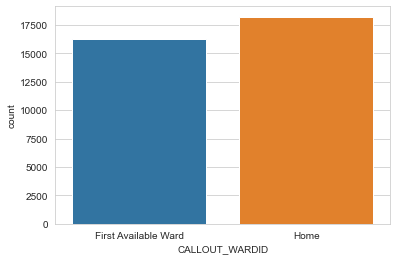

In [13]:
sns.countplot(x = callout_df['CALLOUT_WARDID'].map(lambda x: 'First Available Ward' if x==1 else 'Home'))

The service that the patient is called out to

In [14]:
callout_df[['SUBJECT_ID', 'CALLOUT_SERVICE']].head(30)

,SUBJECT_ID,CALLOUT_SERVICE
0,854,MED
1,864,CSURG
2,864,CSURG
3,867,CCU
4,306,NSURG
5,307,SURG
6,307,SURG
7,307,MED
8,309,CCU
9,310,NSURG


<AxesSubplot:xlabel='CALLOUT_SERVICE', ylabel='count'>

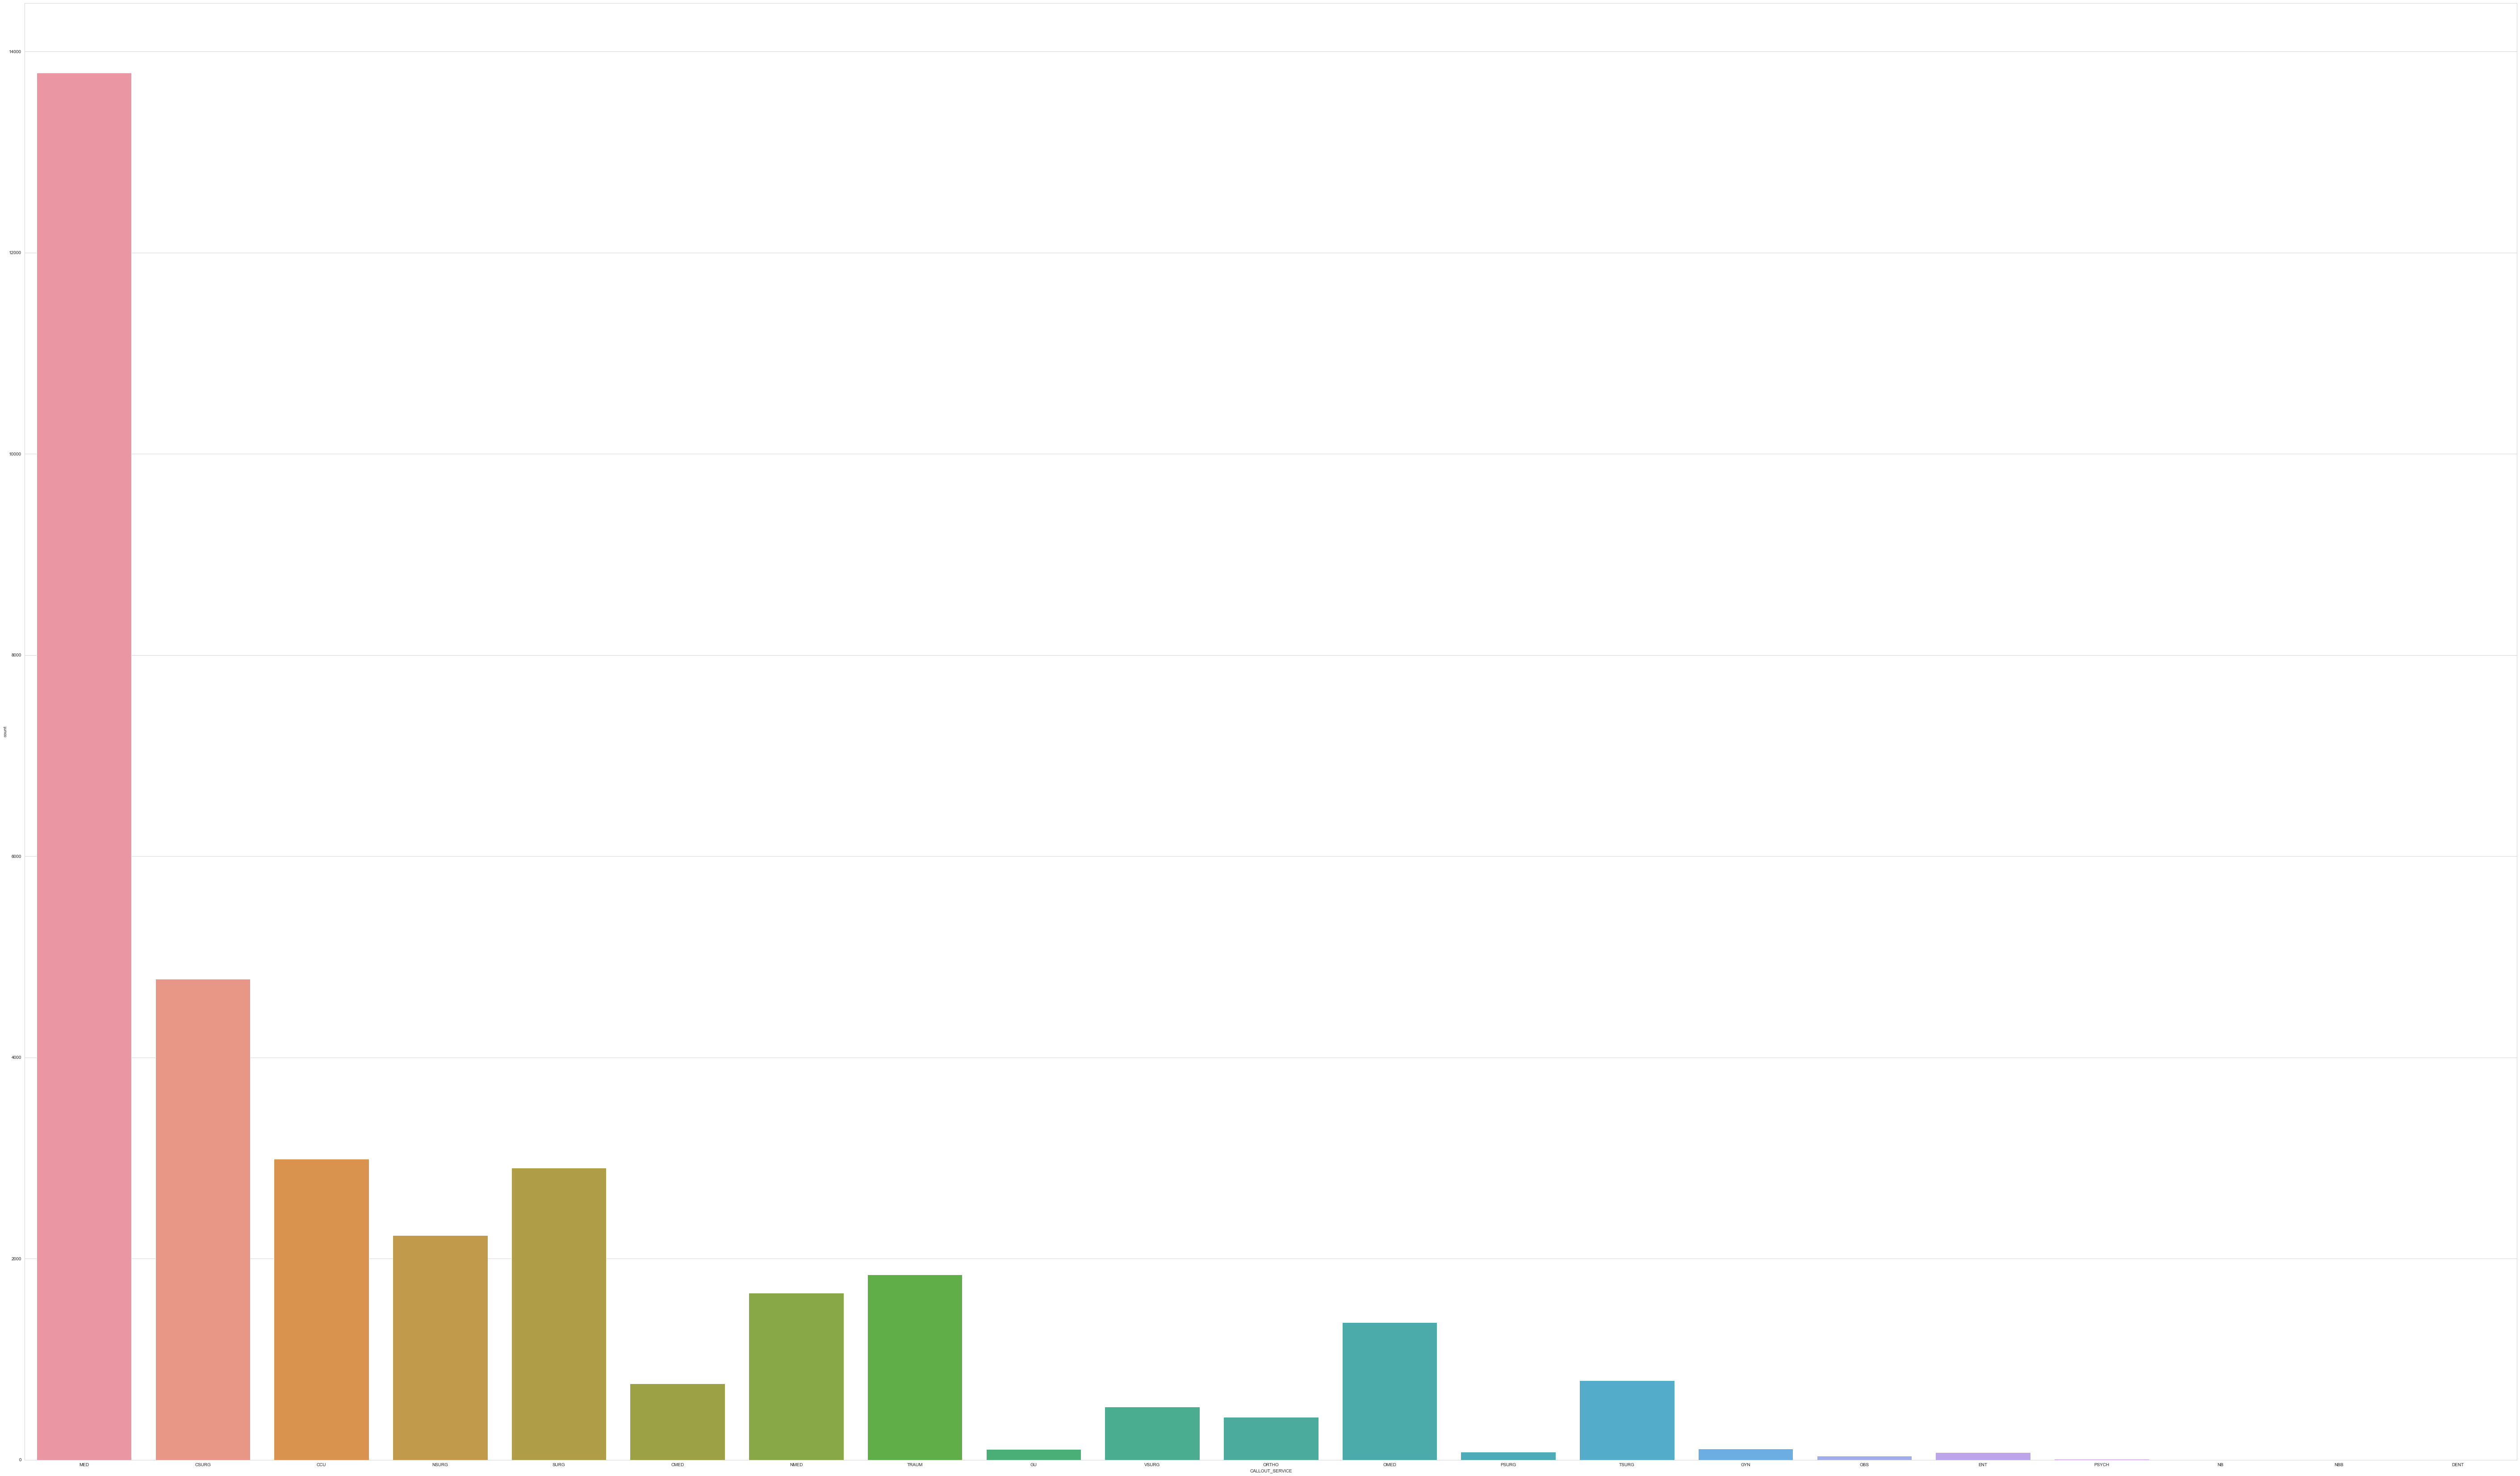

In [15]:
plt.figure(figsize=(100,60))
sns.countplot(x = callout_df['CALLOUT_SERVICE'])

In [16]:
callout_df['CALLOUT_SERVICE'].value_counts()

MED      13791
CSURG     4782
CCU       2993
SURG      2902
NSURG     2234
TRAUM     1840
NMED      1659
OMED      1368
TSURG      789
CMED       760
VSURG      526
ORTHO      424
GYN        112
GU         106
PSURG       78
ENT         76
OBS         41
PSYCH        7
NBB          5
NB           4
DENT         2
Name: CALLOUT_SERVICE, dtype: int64

Care unit	Description <br>
CCU	Coronary care unit <br>
CSRU	Cardiac surgery recovery unit <br>
MICU	Medical intensive care unit <br>
NICU	Neonatal intensive care unit <br>
NWARD	Neonatal ward <br>
SICU	Surgical intensive care unit <br>
TSICU	Trauma/surgical intensive care unit <br>

The following columns indicate if special precautions are required.

In [17]:
callout_df[['REQUEST_TELE', 'REQUEST_RESP', 'REQUEST_CDIFF', 'REQUEST_MRSA', 'REQUEST_VRE']]

,REQUEST_TELE,REQUEST_RESP,REQUEST_CDIFF,REQUEST_MRSA,REQUEST_VRE
0,0,0,0,0,0
1,0,0,0,0,0
2,1,0,0,0,0
3,1,1,0,0,0
4,1,0,0,0,0
...,...,...,...,...,...
34494,1,0,1,0,0
34495,0,0,0,0,0
34496,0,0,0,0,0
34497,0,0,0,0,0


The following columns tell us the current status of the call out and the result of the callout

In [18]:
callout_df[['CALLOUT_STATUS', 'CALLOUT_OUTCOME']]

,CALLOUT_STATUS,CALLOUT_OUTCOME
0,Inactive,Discharged
1,Inactive,Discharged
2,Inactive,Discharged
3,Inactive,Discharged
4,Inactive,Discharged
...,...,...
34494,Inactive,Discharged
34495,Inactive,Discharged
34496,Inactive,Discharged
34497,Inactive,Discharged


In [19]:
callout_df['CALLOUT_STATUS'].value_counts()

Inactive    34499
Name: CALLOUT_STATUS, dtype: int64

All of the callouts have either been discharged or cancelled and hence are currently inactive.

In [20]:
callout_df['CALLOUT_OUTCOME'].value_counts()


Discharged    29965
Cancelled      4534
Name: CALLOUT_OUTCOME, dtype: int64

A comparison of Discharged and Cancelled callouts.

<AxesSubplot:xlabel='CALLOUT_OUTCOME', ylabel='count'>

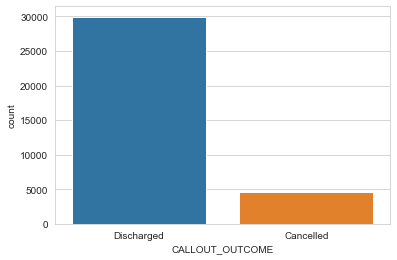

In [21]:
sns.countplot(x = callout_df['CALLOUT_OUTCOME'])